# Exploratory Data Analysis
Performed by: Rebecca Wright<br>
Date: May 12, 2021<br>

> ## Index:
> * Exploratory Data Analysis Notebook
>   * Initial Dataset Notes
>   * Initial Observations
>   * Data Cleaning Section
>   * EDA Section
>     * By Country
>     * By Rankings
>     * By Career Earnings
>     * By Age
>     * By Tour Card
>     * By Relationship: Country vs Ranking
>     * By Relationship: Age vs Ranking
>   * Generating Final Dataset

***
***

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<br>
<br>

## Import dataset

In [3]:
data = pd.read_csv('./data/PlayerProfiles.csv')

In [4]:
data.head()

,Name :,Country :,Age :,Date Of Birth :,Nickname :,PDC Ranking :,Tour Card :,Career Earnings :
0,Michael van Gerwen,Netherlands,32,4/25/1989,Mighty Mike,1,Yes,"£8,321,167"
1,Peter Wright,Scotland,51,3/10/1970,Snake Bite,2,Yes,"£3,469,888"
2,Gerwyn Price,Wales,36,3/7/1985,The Iceman,3,Yes,"£1,497,803"
3,Adrian Lewis,England,36,1/21/1985,Jackpot,13,Yes,"£3,137,634"
4,James Wade,England,38,4/6/1983,The Machine,9,Yes,"£3,458,893"


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name :             96 non-null     object
 1   Country :          96 non-null     object
 2   Age :              96 non-null     int64 
 3   Date Of Birth :    96 non-null     object
 4   Nickname :         96 non-null     object
 5   PDC Ranking :      96 non-null     int64 
 6   Tour Card :        96 non-null     object
 7   Career Earnings :  96 non-null     object
dtypes: int64(2), object(6)
memory usage: 6.1+ KB


<br>
<br>

## Initial Dataset Notes:

* 96 rows of players
* no null values
* non-alpha characters in column names
* "career earnings" column is object dtype

<br>
<br>

## Initial Observations:

* **Career Earnings**: value cannot be used to compare players directly as dataset does not reflect how long each player has been an active competitor

* **Country**: value may be helpful.  Countries where darts are historically more popular may correlate with higher performance rankings by their competitors.  Countries of lower player representation seem to produce competitors of lower performance rank.

<br>
<br>

## Data Cleaning Section

#### **Step 1**: Renamed columns to remove trailing " :"

In [6]:
data.rename(columns=lambda x: x[:-2], inplace=True)

#### **Step 2**: Identify duplicates

#### **Step 2a**: Handle potential duplicate row enteries

In [7]:
data.sort_values(by="PDC Ranking")

,Name,Country,Age,Date Of Birth,Nickname,PDC Ranking,Tour Card,Career Earnings
0,Michael van Gerwen,Netherlands,32,4/25/1989,Mighty Mike,1,Yes,"£8,321,167"
34,Michael van Gerwen,Netherlands,32,4/25/1989,Mighty Mike,1,Yes,"£8,321,167"
19,Michael van Gerwen,Netherlands,32,4/25/1989,Mighty Mike,1,Yes,"£8,321,167"
1,Peter Wright,Scotland,51,3/10/1970,Snake Bite,2,Yes,"£3,469,888"
35,Peter Wright,Scotland,51,3/10/1970,Snake Bite,2,Yes,"£3,469,888"
...,...,...,...,...,...,...,...,...
67,Lisa Ashton,England,50,8/27/1970,The Lancashire Rose,125,2 Year,"£150,704"
80,Andrew Gilding,England,50,12/7/1970,Goldfinger,126,No,"£234,609"
26,Ronny Huybrechts,Belgium,55,7/20/1965,The Rebel,127,No,"£270,743"
41,Ronny Huybrechts,Belgium,55,7/20/1965,The Rebel,127,No,"£270,743"


In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.reset_index(drop=True, inplace=True)

#### **Step 2b:** Handle potential repeats within Name column

In [10]:
data['Name'].shape

(78,)

In [11]:
np.unique(data['Name']).shape

(78,)

#### **Step 2c:** Handle potential repeats within Nickname column

In [12]:
data['Nickname'].shape

(78,)

In [13]:
np.unique(data['Nickname']).shape

(77,)

In [14]:
data['Nickname'].value_counts()

The Spartan      2
Chizzy           1
Hollywood        1
Superman         1
The Lionheart    1
                ..
Noppie           1
The Thorn        1
The Hammer       1
Cool Hand        1
The Needle       1
Name: Nickname, Length: 77, dtype: int64

In [15]:
data.loc[data['Nickname'] == 'The Spartan']

,Name,Country,Age,Date Of Birth,Nickname,PDC Ranking,Tour Card,Career Earnings
59,Devon Petersen,South Africa,34,11/27/1986,The Spartan,54,Yes,"£228,784"
76,Cristo Reyes,Spain,33,7/30/1987,The Spartan,46,Yes,"£343,004"


#### **Notes**: Duplicate Nickname identified
* The Spartan appears twice
* No issue with duplication

#### **Step 3**: Convert Career Earning object values to integer values

In [16]:
data['Career Earnings'].replace("[^0-9]", "",regex=True, inplace=True)

In [17]:
data['Career Earnings'] = data['Career Earnings'].astype(int)

<br>
<br>

## EDA Section

### By Country

**Question**: Where are the dart players from?<br>
**Answer**: 50% England, 13% Netherlands, 5% Scotland, 5% Wales, etc ...

In [18]:
data['Country'].value_counts()

England             39
Netherlands         10
Wales                4
Scotland             4
Northern Ireland     3
Belgium              3
Spain                2
Germany              2
Australia            2
Austria              2
South Africa         1
Ireland              1
Canada               1
Lithuania            1
Greece               1
Brazil               1
Latvia               1
Name: Country, dtype: int64

In [19]:
data['Country'].value_counts(normalize=True)

England             0.500000
Netherlands         0.128205
Wales               0.051282
Scotland            0.051282
Northern Ireland    0.038462
Belgium             0.038462
Spain               0.025641
Germany             0.025641
Australia           0.025641
Austria             0.025641
South Africa        0.012821
Ireland             0.012821
Canada              0.012821
Lithuania           0.012821
Greece              0.012821
Brazil              0.012821
Latvia              0.012821
Name: Country, dtype: float64

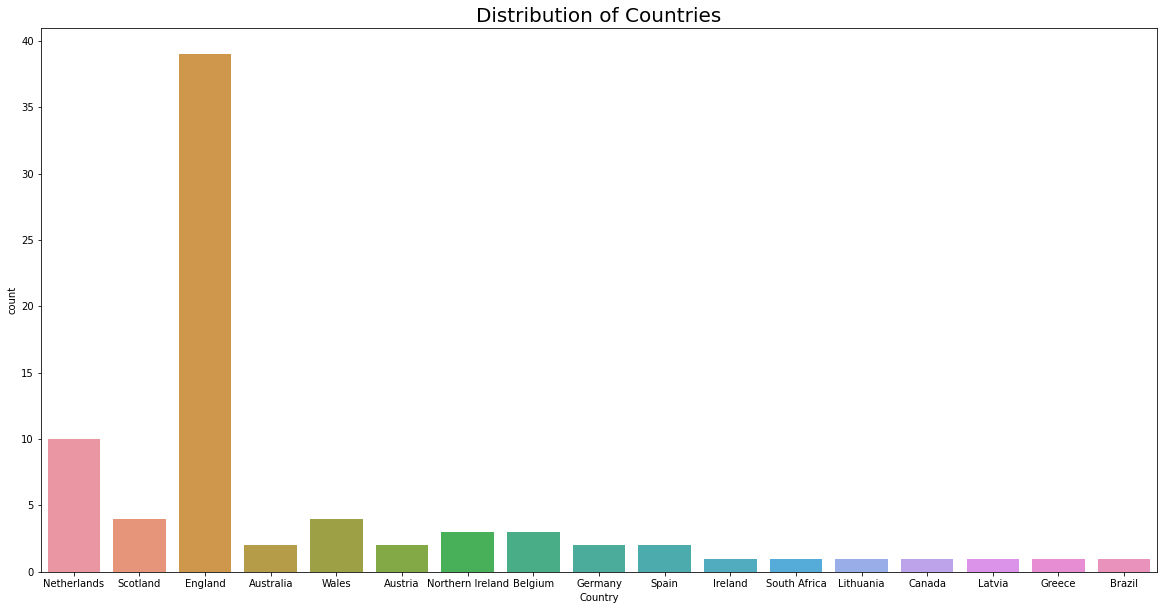

In [323]:
plt.figure(figsize=(20,10))
sns.countplot(x="Country", data=data)
plt.title('Distribution of Countries', fontsize = 20);

<br>
<br>

## By Rankings

**Action**: As part of data cleaning, confirm all players have unique ranking value.

**Observation**: PDC Ranking values are non-consecutively represented values

In [21]:
data['PDC Ranking'].shape

(78,)

In [22]:
np.unique(data['PDC Ranking']).shape

(78,)

In [23]:
data.sort_values('PDC Ranking')

,Name,Country,Age,Date Of Birth,Nickname,PDC Ranking,Tour Card,Career Earnings
0,Michael van Gerwen,Netherlands,32,4/25/1989,Mighty Mike,1,Yes,8321167
1,Peter Wright,Scotland,51,3/10/1970,Snake Bite,2,Yes,3469888
2,Gerwyn Price,Wales,36,3/7/1985,The Iceman,3,Yes,1497803
77,Rob Cross,England,30,9/21/1990,Voltage,4,Yes,1622600
52,Michael Smith,England,30,9/18/1990,Bully Boy,5,Yes,1769935
...,...,...,...,...,...,...,...,...
71,Rhys Hayden,England,26,10/8/1994,Lightning,124,No,18672
50,Lisa Ashton,England,50,8/27/1970,The Lancashire Rose,125,2 Year,150704
63,Andrew Gilding,England,50,12/7/1970,Goldfinger,126,No,234609
24,Ronny Huybrechts,Belgium,55,7/20/1965,The Rebel,127,No,270743


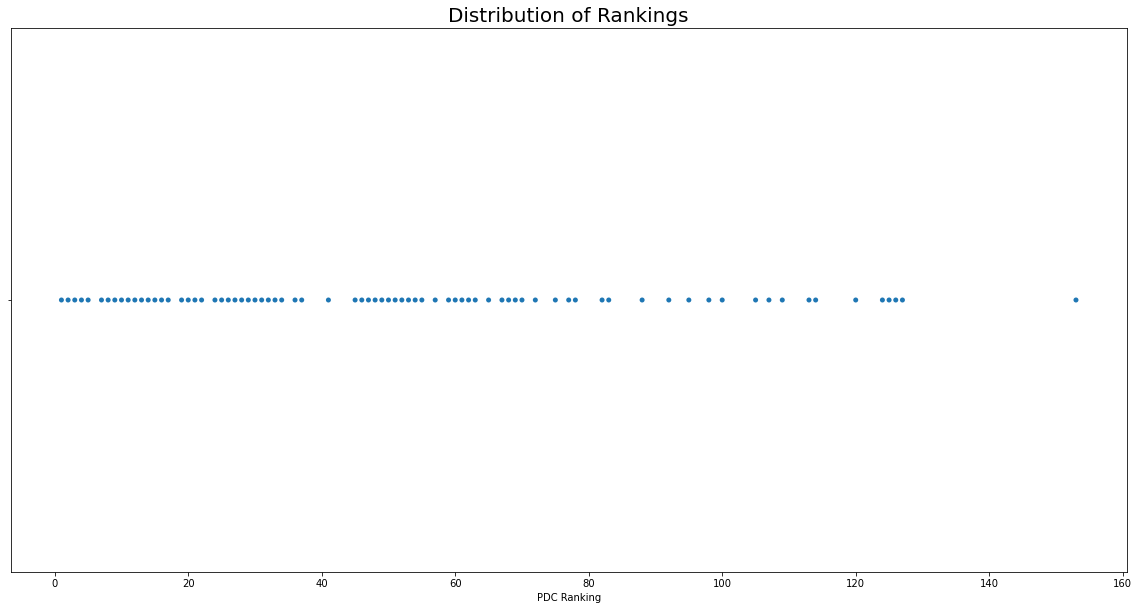

In [321]:
plt.figure(figsize=(20,10))
sns.swarmplot(x="PDC Ranking", data=data)
plt.title('Distribution of Rankings', fontsize = 20);

### **Feature Engineered:** Create ranking_index Column.
Sort dataset by PDC Ranking and create index reference values.

In [25]:
data.sort_values('PDC Ranking', ascending = True, inplace=True)

In [26]:
data['ranking_index'] = data.reset_index().index

In [27]:
data.head()

,Name,Country,Age,Date Of Birth,Nickname,PDC Ranking,Tour Card,Career Earnings,ranking_index
0,Michael van Gerwen,Netherlands,32,4/25/1989,Mighty Mike,1,Yes,8321167,0
1,Peter Wright,Scotland,51,3/10/1970,Snake Bite,2,Yes,3469888,1
2,Gerwyn Price,Wales,36,3/7/1985,The Iceman,3,Yes,1497803,2
77,Rob Cross,England,30,9/21/1990,Voltage,4,Yes,1622600,3
52,Michael Smith,England,30,9/18/1990,Bully Boy,5,Yes,1769935,4


<br>
<br>

## By Career Earnings

**Observation**: Career Earnings do not correlate to PDC Ranking values directly.  PDC Rankings based on winnings from past 2 years only.  Confirmed this by creating and comparing relatable indexing values between career earnings and ranking.

In [28]:
data['Career Earnings'].describe()

count    7.800000e+01
mean     7.989877e+05
std      1.202448e+06
min      1.867200e+04
25%      1.805180e+05
50%      3.466580e+05
75%      1.024786e+06
max      8.321167e+06
Name: Career Earnings, dtype: float64

In [29]:
data['Career Earnings'].mean()

798987.717948718

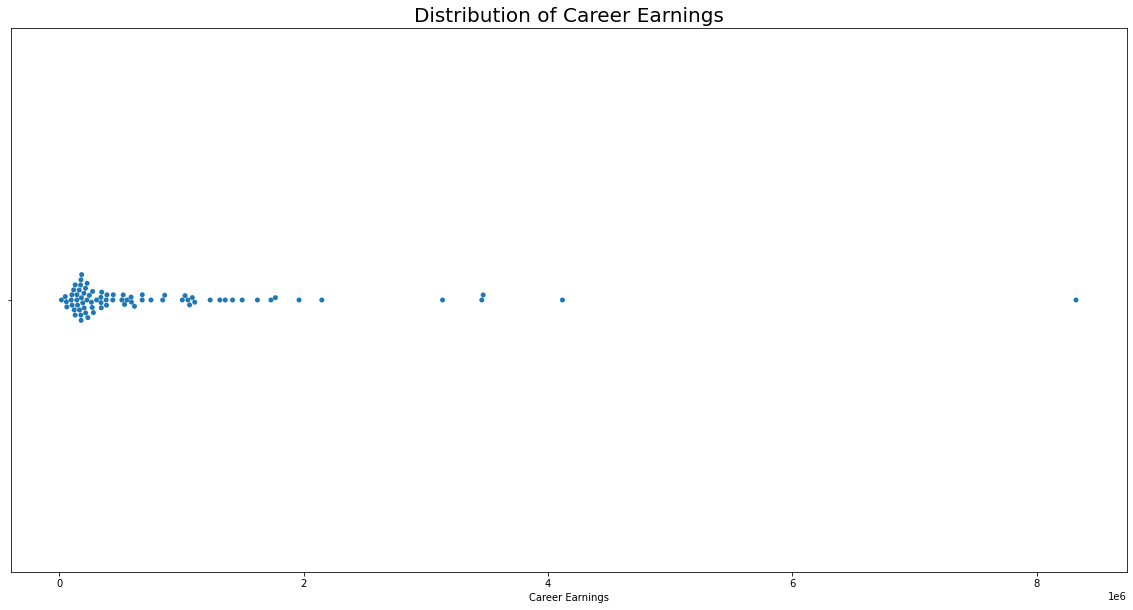

In [320]:
plt.figure(figsize=(20,10))
sns.swarmplot(x="Career Earnings", data=data)
plt.title('Distribution of Career Earnings', fontsize = 20);

### **Feature Engineered:** Create earning_index Column.
Sort dataset by Career Earnings and create index reference values.

In [31]:
data.sort_values('Career Earnings', ascending = False, inplace=True)

In [32]:
data['earning_index'] = data.reset_index().index

In [33]:
data.head()

,Name,Country,Age,Date Of Birth,Nickname,PDC Ranking,Tour Card,Career Earnings,ranking_index,earning_index
0,Michael van Gerwen,Netherlands,32,4/25/1989,Mighty Mike,1,Yes,8321167,0,0
16,Gary Anderson,Scotland,50,12/22/1970,The Flying Scotsman,8,Yes,4118772,6,1
1,Peter Wright,Scotland,51,3/10/1970,Snake Bite,2,Yes,3469888,1,2
4,James Wade,England,38,4/6/1983,The Machine,9,Yes,3458893,7,3
3,Adrian Lewis,England,36,1/21/1985,Jackpot,13,Yes,3137634,11,4


<br>
<br>

## By Age

**Observation**: Fairly balanced representation of ages.

In [34]:
data['Age'].describe()

count    78.000000
mean     39.717949
std       9.646879
min      24.000000
25%      32.000000
50%      36.500000
75%      49.000000
max      57.000000
Name: Age, dtype: float64

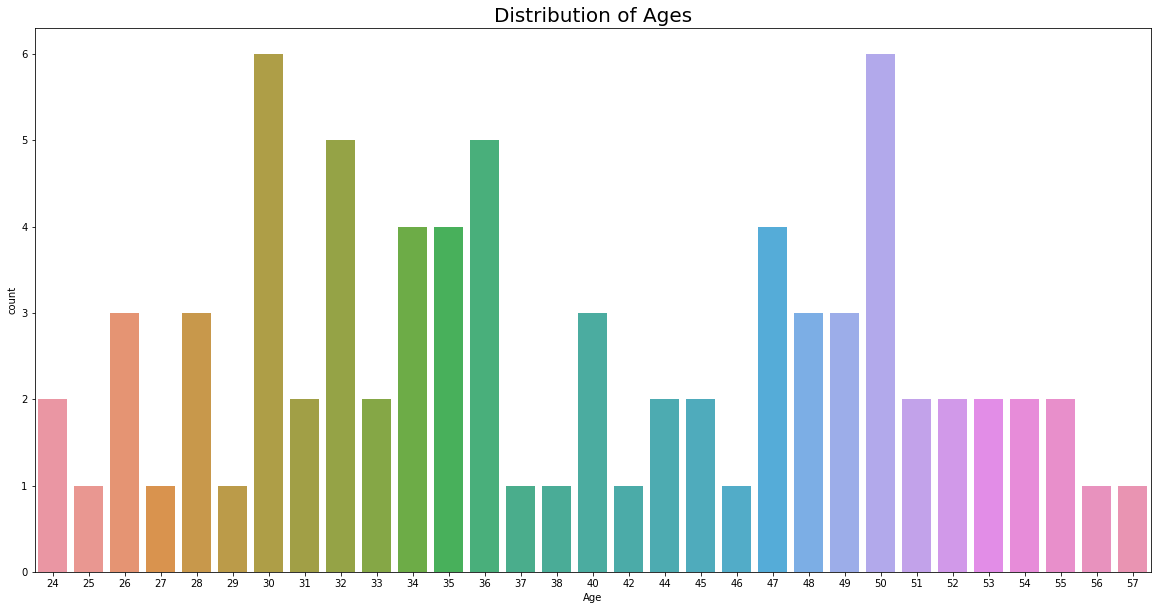

In [319]:
plt.figure(figsize=(20,10))
sns.countplot(x="Age", data=data)
plt.title('Distribution of Ages', fontsize = 20);

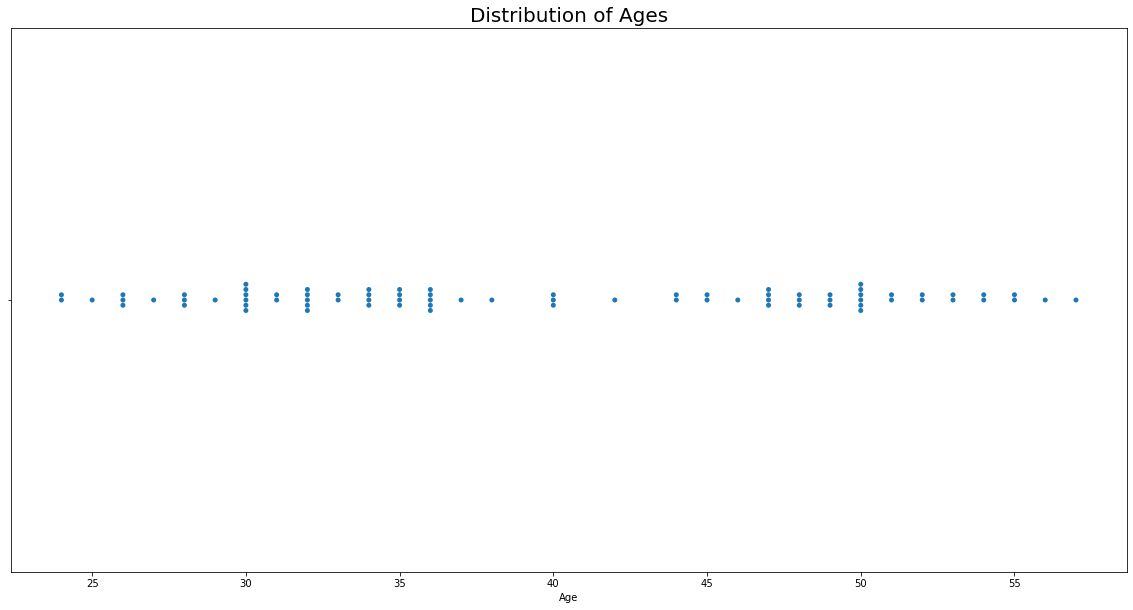

In [318]:
plt.figure(figsize=(20,10))
sns.swarmplot(x="Age", data=data)
plt.title('Distribution of Ages', fontsize = 20);

In [37]:
data['Age'].value_counts(normalize=True)

50    0.076923
30    0.076923
36    0.064103
32    0.064103
47    0.051282
34    0.051282
35    0.051282
48    0.038462
49    0.038462
40    0.038462
28    0.038462
26    0.038462
45    0.025641
53    0.025641
54    0.025641
51    0.025641
55    0.025641
52    0.025641
24    0.025641
44    0.025641
33    0.025641
31    0.025641
46    0.012821
42    0.012821
25    0.012821
38    0.012821
37    0.012821
29    0.012821
27    0.012821
56    0.012821
57    0.012821
Name: Age, dtype: float64

<br>
<br>

## By Tour Card

**Observation**: Surprised by the presences of non-tour card players in set.

In [38]:
data['Tour Card'].value_counts()

Yes       63
2 Year    10
No         5
Name: Tour Card, dtype: int64

In [39]:
data['Tour Card'].value_counts(normalize=True)

Yes       0.807692
2 Year    0.128205
No        0.064103
Name: Tour Card, dtype: float64

<br>**Observation**: Non card holding members and 2 year card members don't rank higher that 77th place.

In [40]:
data.loc[data['Tour Card'] == '2 Year']

,Name,Country,Age,Date Of Birth,Nickname,PDC Ranking,Tour Card,Career Earnings,ranking_index,earning_index
5,Andy Hamilton,England,54,3/16/1967,The Hammer,105,2 Year,1089788,67,16
31,Scott Waites,England,44,2/17/1977,Scotty 2 Hotty,100,2 Year,679769,66,25
8,Wayne Jones,England,56,4/24/1965,The Wanderer,113,2 Year,588436,70,28
7,Alan Tabern,England,54,9/23/1966,The Saint,98,2 Year,443150,65,33
39,Steve Brown,England,40,1/25/1981,The Bomber,114,2 Year,177569,71,60
51,Wesley Harms,Netherlands,36,6/11/1984,Sparky,109,2 Year,175683,69,61
50,Lisa Ashton,England,50,8/27/1970,The Lancashire Rose,125,2 Year,150704,74,64
62,Dirk van Duijvenbode,Netherlands,28,6/30/1992,Titan,77,2 Year,131387,58,67
47,Jeff Smith,Canada,45,11/6/1975,The Silencer,92,2 Year,123511,63,69
49,Peter Jacques,England,48,3/29/1973,The Terrier,120,2 Year,62650,72,74


In [41]:
data.loc[data['Tour Card'] == 'No']

,Name,Country,Age,Date Of Birth,Nickname,PDC Ranking,Tour Card,Career Earnings,ranking_index,earning_index
24,Ronny Huybrechts,Belgium,55,7/20/1965,The Rebel,127,No,270743,76,45
41,Scott Mitchell,England,50,6/5/1970,Scotty Dog,107,No,264352,68,46
63,Andrew Gilding,England,50,12/7/1970,Goldfinger,126,No,234609,75,48
72,Diogo Portela,Brazil,32,6/12/1988,Braziliant,153,No,59367,77,75
71,Rhys Hayden,England,26,10/8/1994,Lightning,124,No,18672,73,77


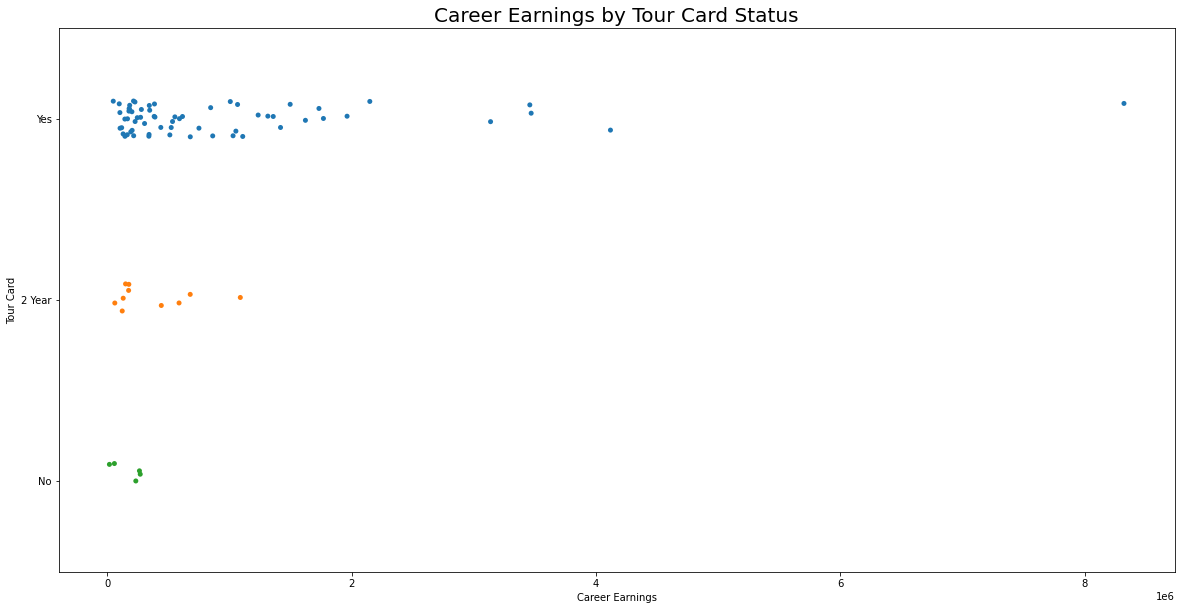

In [317]:
plt.figure(figsize=(20,10))
sns.stripplot(x='Career Earnings', y='Tour Card', data=data)
plt.title('Career Earnings by Tour Card Status', fontsize = 20);

<br>
<br>

## By Relationship: Country vs Ranking

**Observation**: value may be helpful.  Countries where darts are historically more popular may correlate with higher performance rankings by their competitors.  Countries of lower player representation seem to produce competitors of lower performance rank.

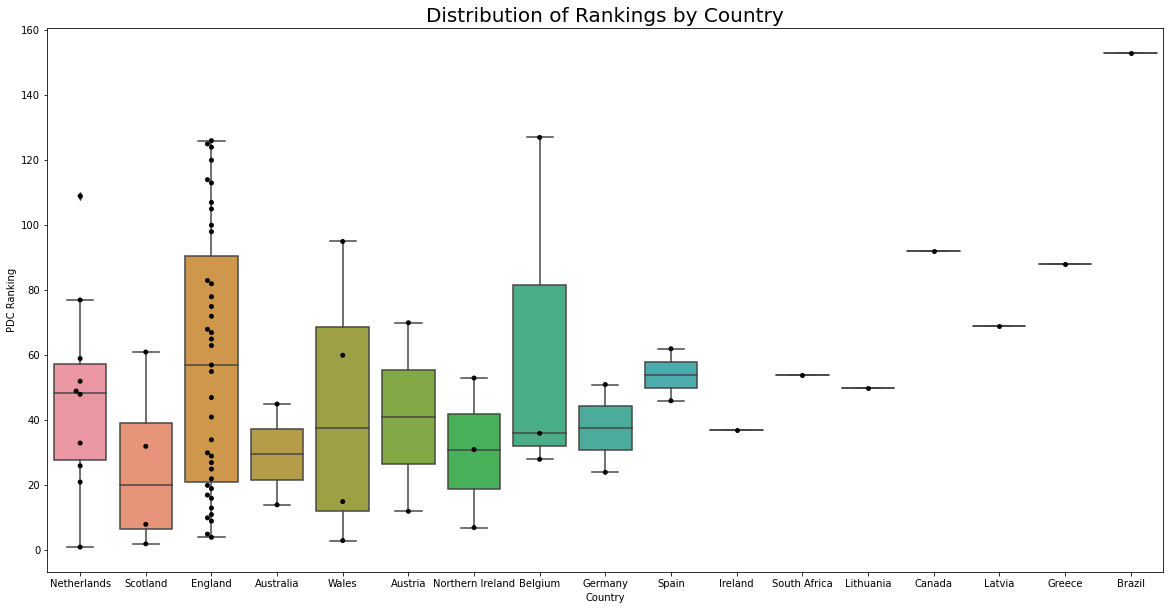

In [316]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(x='Country', y='PDC Ranking', data=data)
ax = sns.swarmplot(x='Country', y='PDC Ranking', data=data, color='black')
plt.title('Distribution of Rankings by Country', fontsize = 20);

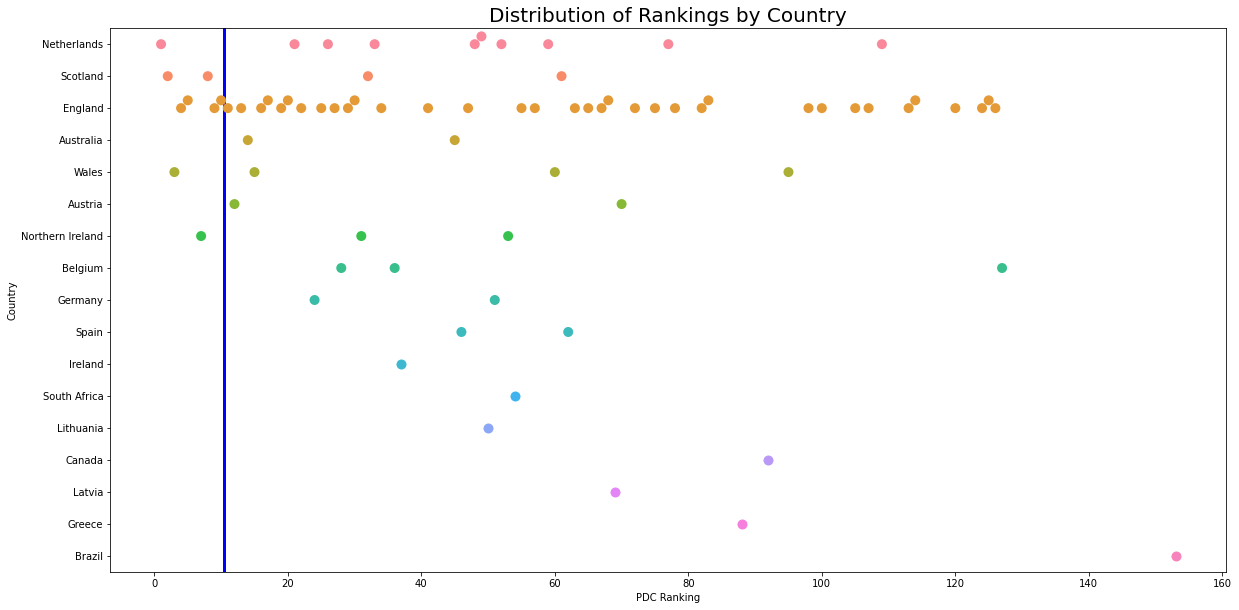

In [315]:
plt.figure(figsize=(20,10))
ax = sns.swarmplot(y='Country', x='PDC Ranking', data=data, size=10)
plt.axvline(x=10.5, color='blue', ls='-', lw=3)
plt.title('Distribution of Rankings by Country', fontsize = 20);

<br><br>

## By Relationship: Age vs Ranking

**Observation**: Age and ranking do not appear to have a strong direct correlation.

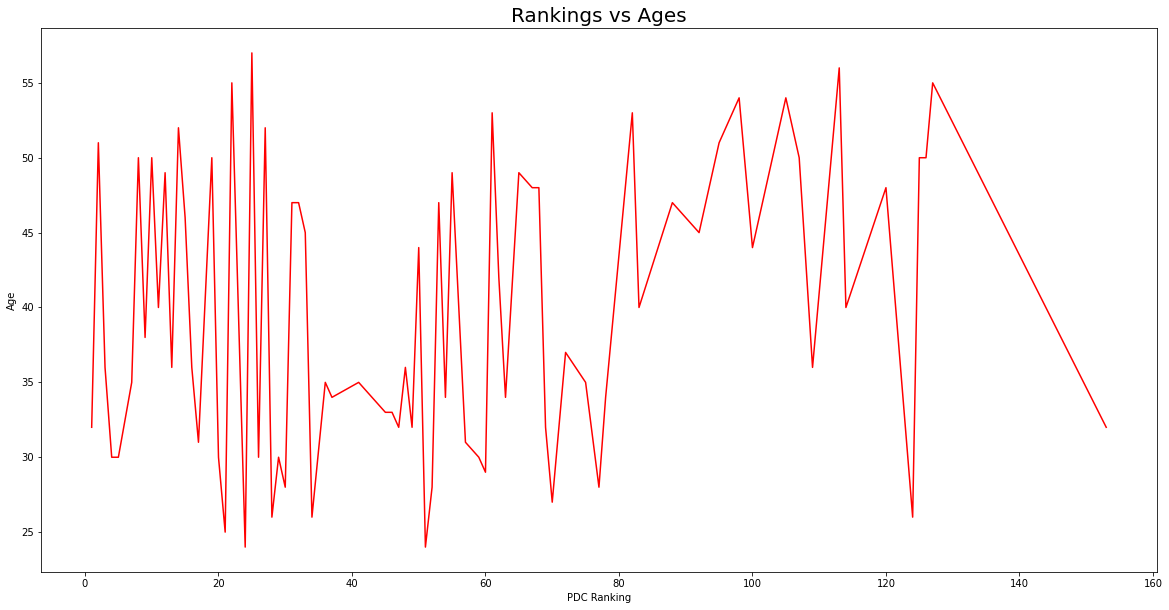

In [322]:
plt.figure(figsize=(20,10))
sns.lineplot(y='Age', x='PDC Ranking', data=data, markers='o', color='red')
plt.title('Rankings vs Ages', fontsize = 20);

<br>
<br>

***
***

# Generate Final Dataset

## Import additional dataset

In [324]:
data2 = pd.read_csv('./data/Top500DartsPlayers.csv')

In [325]:
data2.head()

,Rank,Player,Country,Prize
0,1,Michael van Gerwen,Netherlands,"£8,321,167"
1,2,Phil Taylor,England,"£7,630,816"
2,3,Gary Anderson,Scotland,"£4,118,772"
3,4,Raymond van Barneveld,Netherlands,"£3,510,128"
4,5,Peter Wright,Scotland,"£3,470,888"


In [116]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Rank     500 non-null    int64 
 1   Player   500 non-null    object
 2   Country  500 non-null    object
 3   Prize    500 non-null    object
dtypes: int64(1), object(3)
memory usage: 15.8+ KB


<br>
<br>

## Initial Dataset Notes:

* 500 rows of players
* no null values
* "Prize" column is object dtype

<br>
<br>

## Data Cleaning Section

In [117]:
data2['Prize'].replace("[^0-9]", "",regex=True, inplace = True)

In [118]:
data2['Prize'] = data2['Prize'].astype(int)

In [119]:
data2.head()

,Rank,Player,Country,Prize
0,1,Michael van Gerwen,Netherlands,8321167
1,2,Phil Taylor,England,7630816
2,3,Gary Anderson,Scotland,4118772
3,4,Raymond van Barneveld,Netherlands,3510128
4,5,Peter Wright,Scotland,3470888


<br>
<br>

## Dataframe Merge Section

In [291]:
df = data2.merge(data, how='left', left_on='Player', right_on='Name')

In [292]:
df = df.drop(columns=['ranking_index', 'earning_index', 'Nickname', 'Date Of Birth'])

In [293]:
# Confirm correct merge of all 78 player profiles into top 500 players info
df.Name.count()

78

In [294]:
df = df.drop(columns=['Name'])

In [295]:
df = df.rename(columns={'Rank': 'Career Rank'})

In [296]:
#Confirm continuity between Country_x and Country_y
df['country_compare'] = np.where((df['Country_x'] == df['Country_y']) | (df['Country_y'] != np.nan), True, False)

In [297]:
# Check countries are full matches, and they are
df['country_compare'].value_counts()

True    500
Name: country_compare, dtype: int64

In [298]:
# Delete following columns: 'Country_y', 'country_compare'
# rename Country_x to 'Country'
df = df.drop(columns=['Country_y', 'country_compare'])
df = df.rename(columns={'Country_x': 'Country'})

In [299]:
df.head()

,Career Rank,Player,Country,Prize,Age,PDC Ranking,Tour Card,Career Earnings
0,1,Michael van Gerwen,Netherlands,8321167,32.0,1.0,Yes,8321167.0
1,2,Phil Taylor,England,7630816,NaN,NaN,NaN,NaN
2,3,Gary Anderson,Scotland,4118772,50.0,8.0,Yes,4118772.0
3,4,Raymond van Barneveld,Netherlands,3510128,NaN,NaN,NaN,NaN
4,5,Peter Wright,Scotland,3470888,51.0,2.0,Yes,3469888.0


In [300]:
#Confirm continuity between Country_x and Country_y
df['money_compare'] = np.where((df['Prize'] == df['Career Earnings']), True, False)

In [301]:
# Check money columns are full matches, there are 4 rows that do not match
df['money_compare'].value_counts()

False    426
True      74
Name: money_compare, dtype: int64

In [302]:
df.head()

,Career Rank,Player,Country,Prize,Age,PDC Ranking,Tour Card,Career Earnings,money_compare
0,1,Michael van Gerwen,Netherlands,8321167,32.0,1.0,Yes,8321167.0,True
1,2,Phil Taylor,England,7630816,NaN,NaN,NaN,NaN,False
2,3,Gary Anderson,Scotland,4118772,50.0,8.0,Yes,4118772.0,True
3,4,Raymond van Barneveld,Netherlands,3510128,NaN,NaN,NaN,NaN,False
4,5,Peter Wright,Scotland,3470888,51.0,2.0,Yes,3469888.0,False


In [303]:
temp_df = df.loc[(df['money_compare'] == False) & (df['Career Earnings'] > 0)]

In [304]:
temp_df['diff'] = (temp_df['Prize'] - temp_df['Career Earnings'])

<ipython-input-304-9350af510d62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['diff'] = (temp_df['Prize'] - temp_df['Career Earnings'])


In [305]:
temp_df

,Career Rank,Player,Country,Prize,Age,PDC Ranking,Tour Card,Career Earnings,money_compare,diff
4,5,Peter Wright,Scotland,3470888,51.0,2.0,Yes,3469888.0,False,1000.0
18,19,Steve Beaton,England,1109305,57.0,25.0,Yes,1109555.0,False,-250.0
41,42,Wayne Jones,England,587186,56.0,113.0,2 Year,588436.0,False,-1250.0
84,85,Barrie Bates,Wales,247063,51.0,95.0,Yes,246563.0,False,500.0


**Observation**: Errors between Prize and Career Earnings are small enough that the career earnings column can be discarded and the prize column can be used alone

In [306]:
# Drop Career Earnings and money_compare columns
df = df.drop(columns=['Career Earnings', 'money_compare', 'Prize'])

# Drop all rows with NaNs (reduce back to 78 player profile rows)
df = df.dropna()

# Cast Age and PDC Ranking columns to ints
df['Age'] = df['Age'].astype(int)
df['PDC Ranking'] = df['PDC Ranking'].astype(int)

# Rename Columns
df = df.rename(columns={'PDC Ranking': 'PDC Rank'})

In [307]:
df = df.reset_index(drop = True)

In [309]:
column_names = ["Player", "Country", "Age", "Career Rank", "PDC Rank", "Tour Card"]

df = df.reindex(columns=column_names)

## Preview of final dataset

In [310]:
df

,Player,Country,Age,Career Rank,PDC Rank,Tour Card
0,Michael van Gerwen,Netherlands,32,1,1,Yes
1,Gary Anderson,Scotland,50,3,8,Yes
2,Peter Wright,Scotland,51,5,2,Yes
3,James Wade,England,38,6,9,Yes
4,Adrian Lewis,England,36,7,13,Yes
...,...,...,...,...,...,...
73,John Michael,Greece,47,164,88,Yes
74,Peter Jacques,England,48,213,120,2 Year
75,Diogo Portela,Brazil,32,220,153,No
76,Conan Whitehead,England,35,244,75,Yes


#### Write final dataframe

In [326]:
df.to_csv('./data/finalPlayerProfileData.csv', index=False)